In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

In [97]:
from michigan.fusion import Fusion
from michigan.dataprep import Data
import matplotlib.pyplot as plt
from nansat import Nansat
from michigan.michigan import MichiganProcessing
from michigan.plotbox import show_it
import numpy as np
from sklearn.cluster import KMeans


In [37]:
m_file = '/data/reprojected_data/MODISa/A2016187190000.L2_LAC_OC.x.nc_reprojected.nc'
s_file = '/data/reprojected_data/sentinel2/S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc'

In [40]:
mic_fuse = Fusion(m_file, s_file)

michigan/fusion.py:101: RuntimeWarning: invalid value encountered in greater
  hires_arr[:, hires_arr[7] > self.bMax] = np.nan
michigan/fusion.py:102: RuntimeWarning: invalid value encountered in less
  hires_arr[:, hires_arr[0] < self.bMin] = np.nan


In [41]:
n_lores, n_hires = mic_fuse.fusion(m_wavelengths='1x1km_bands')

Creating training datasets from input data ... 

/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ovl_plugins-0.1.42-py2.7.egg/ovl_plugins/fusion/fusion.py:98: RuntimeWarning: invalid value encountered in less
  nnData[nnData < 0] = np.nan
/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ovl_plugins-0.1.42-py2.7.egg/ovl_plugins/fusion/fusion.py:99: RuntimeWarning: invalid value encountered in greater
  nnData[nnData > 1] = np.nan


 Number of training vectors: 1894
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.172
001 -> 0.171
002 -> 0.170
003 -> 0.168
004 -> 0.168
005 -> 0.167
006 -> 0.166
007 -> 0.164
008 -> 0.164
009 -> 0.162
010 -> 0.162
011 -> 0.161
012 -> 0.159
013 -> 0.159
014 -> 0.158
015 -> 0.157
016 -> 0.155
017 -> 0.153
018 -> 0.152
019 -> 0.150
Training network - OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Creating training datasets from input data ...  Number of training vectors: 1892
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.167
001 -> 0.167
002 -> 0.166
003 -> 0.166
004 -> 0.167
005 -> 0.165
006 -> 0.166
007 -> 0.165
008 -> 0.165
009 -> 0.165
010 -> 0.165
011 -> 0.165
012 -> 0.165
013 -> 0.164
014 -> 0.164
015 -> 0.164
016 -> 0.164
017 -> 0.163
018 -> 0.162
019 -> 0.162
Training network - OK!
Sav

In [43]:
%mkdir /data/fused_data/

In [44]:
n_hires.export('/data/fused_data/20160705_20iter_neg_on_hires.nc')

<IPython.core.display.Javascript object>


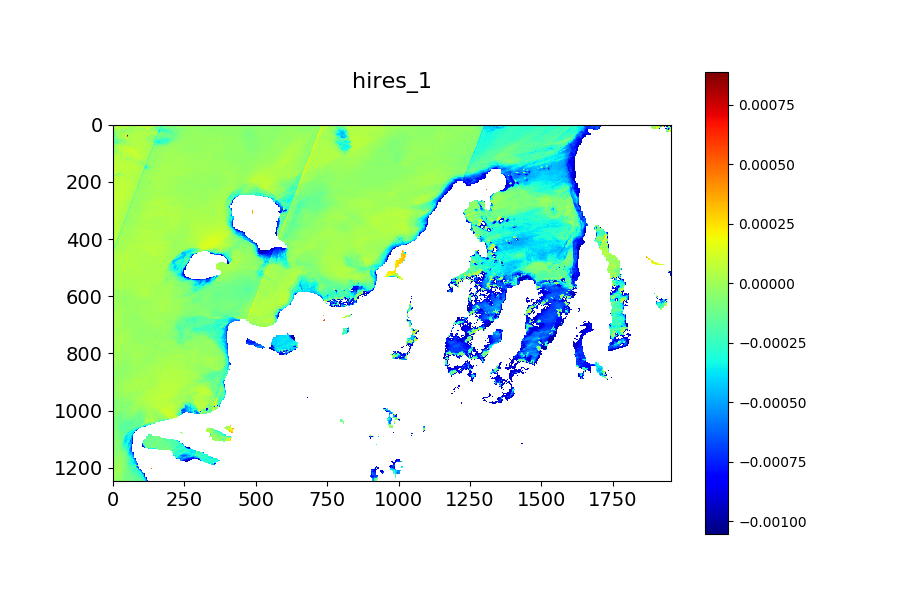

In [61]:
show_it(n_hires[6], 'hires_1')


In [65]:
mic_fused_boreali = MichiganProcessing('/data/fused_data/20160705_20iter_neg_on_hires.nc')

In [51]:
mic_fused_boreali_cpa = mic_fused_boreali.boreali_processing()

=>michigan.grd<=


michigan/michigan.py:50: RuntimeWarning: invalid value encountered in less_equal
  h_10m = np.where(h <= 10, np.array(1), np.nan)


wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_


/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/boreali/boreali.py:295: RuntimeWarning: invalid value encountered in less
  negativePixels = rrsw.min(axis=0) < 0


Pixels x bands to process:  (374789, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  704.30582881


=>michigan.grd<=


<IPython.core.display.Javascript object>


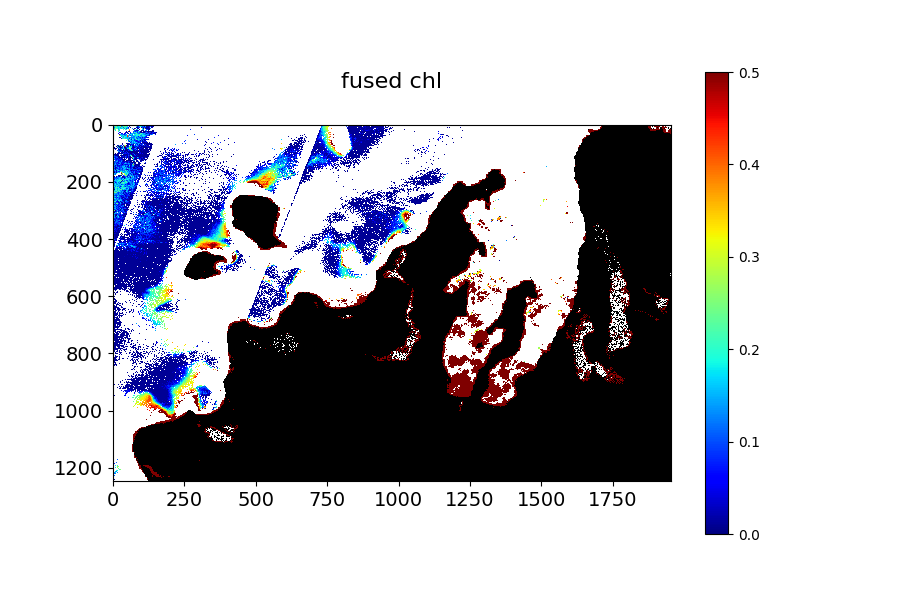

In [74]:
show_it(mic_fused_boreali_cpa['chl'], name='fused chl', limits=[0, 0.5], land_mask=mic_fused_boreali.get_land_mask())

=>michigan.grd<=
=>michigan.grd<=


<IPython.core.display.Javascript object>


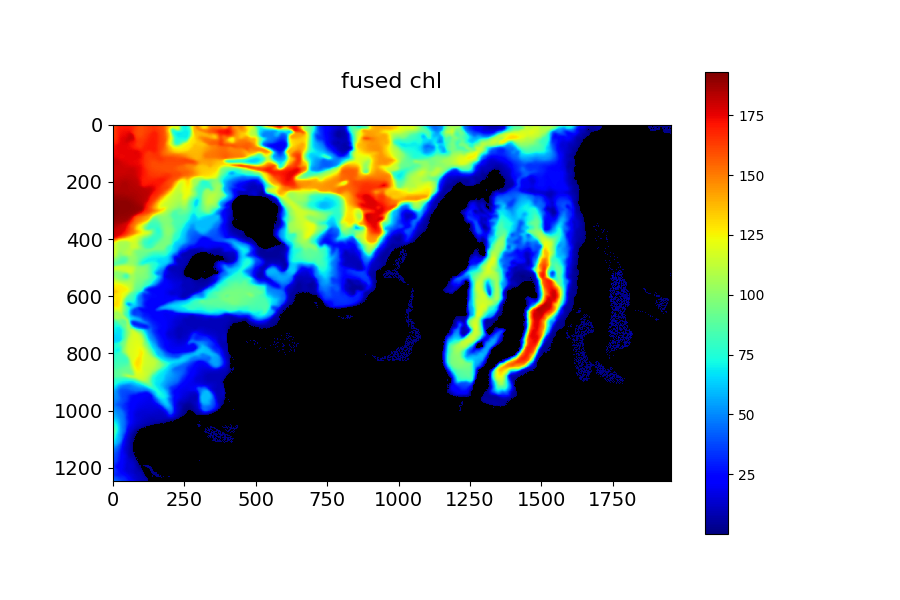

In [73]:
show_it(mic_fused_boreali.get_bottom(), name='fused chl', land_mask=mic_fused_boreali.get_land_mask())

In [314]:
k_train_arr = []
for band in mic_fused_boreali.wavelengths['modis']['1x1km_bands']:
        arr = mic_fused_boreali.ifile['Rrs_%s' % (band)]
        arr[np.isnan(arr) == True] = 999
        k_train_arr.append(arr.ravel())

k_train_arr = np.array(k_train_arr).T
kmeans = KMeans(n_clusters=5, random_state=0).fit(k_train_arr)
k_arr = kmeans.labels_

In [306]:
mask = np.where(np.isnan(mic_fused_boreali.ifile[2]), 0, 1).ravel()

In [307]:
mask[mask == 1] = arr


In [308]:
mask = np.where(mask == 0, np.nan, mask)

In [305]:
mask.ravel()

array([  2.,   2.,   2., ...,  nan,  nan,  nan])

=>michigan.grd<=


<IPython.core.display.Javascript object>


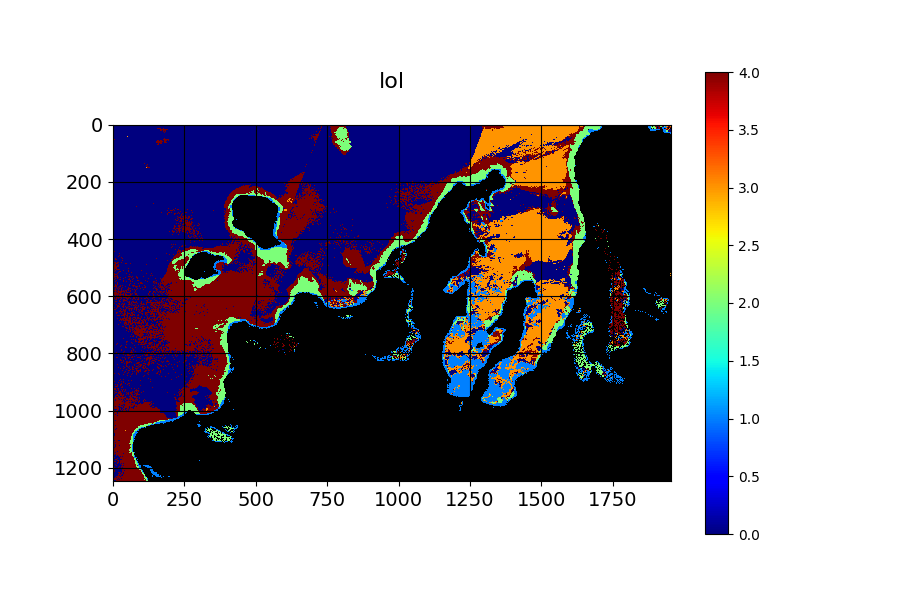

In [315]:

show_it(k_arr.reshape(mic_fused_boreali.domain.shape()), 'lol', land_mask=mic_fused_boreali.get_land_mask())


<IPython.core.display.Javascript object>


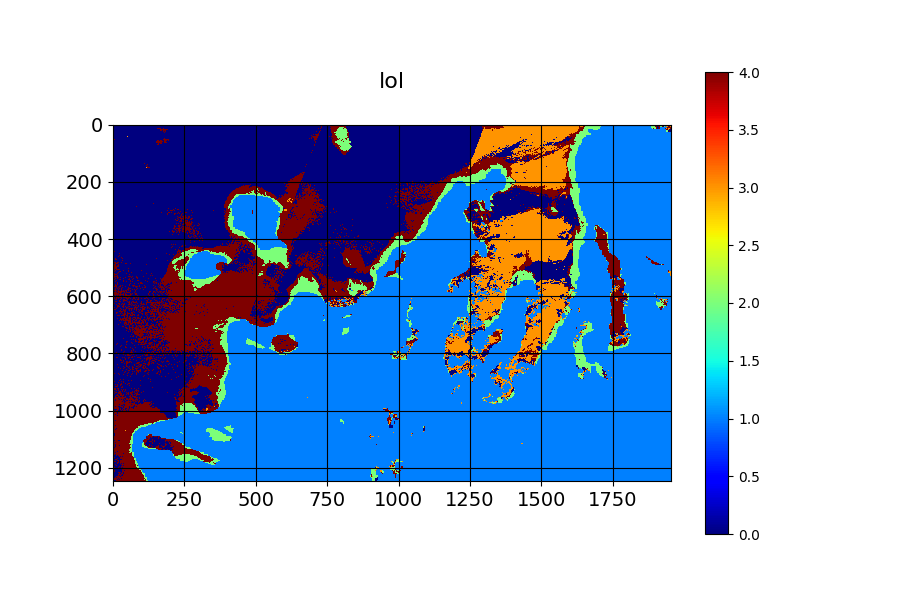

In [317]:
k_train_arr = []
for band in mic_fused_boreali.wavelengths['modis']['1x1km_bands']:
        arr = mic_fused_boreali.ifile['Rrs_%s' % (band)]
        arr[np.isnan(arr) == True] = 999
        k_train_arr.append(arr.ravel())

k_train_arr = np.array(k_train_arr).T
kmeans = KMeans(n_clusters=5, random_state=0).fit(k_train_arr)
k_arr = kmeans.labels_
show_it(k_arr.reshape(mic_fused_boreali.domain.shape()), 'lol')


<IPython.core.display.Javascript object>


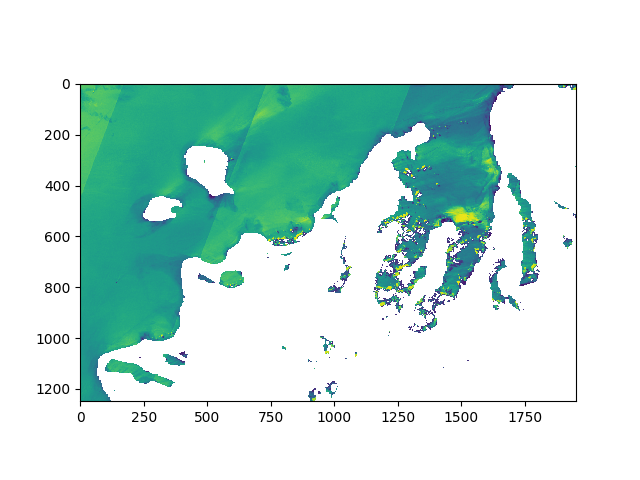

In [296]:
plt.figure()
plt.imshow(mic_fused_boreali.ifile[2])
plt.show()

In [189]:
a

array([ 0.00240369,  0.00254307,  0.00254307, ...,  0.00199569,
       -0.00027975, -0.00096199])

In [191]:
a.shape

(1176009,)

In [199]:
%display(map)

ERROR:root:Line magic function `%display` not found.
